In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
from mpl_toolkits.mplot3d import Axes3D
import netCDF4
import numpy
import os
import pandas
from PIL import Image
import random
import readline
import scipy
from scipy import fft
from scipy import linalg
from scipy import stats
from scipy.stats import poisson, ttest_ind
import seaborn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import normalize
from statsmodels.tsa.ar_model import AutoReg
import xarray as xr

In [2]:
Diri = '/glade/u/home/whimkao//ExtraTrack/Output_Files/'

In [3]:
# Open File
def Open_File(File):
    DF = pandas.read_csv(File)
    DF = DF.drop("Unnamed: 0", axis=1)
    return (DF)

In [4]:
# Open Each File
def Files_Open(Model, Diri):
    Data_DF = Open_File(Diri+Model+'_Data_Output_V4.csv')
    ET_DF = Open_File(Diri+Model+'_ET_Output_V4.csv')
    Codes_DF = Open_File(Diri+Model+'_Codes_Output_V4.csv')
    Storms_DF = Open_File(Diri+Model+'_Storms_Output_V4.csv')
    Time = []
    Start_Time = []
    End_Time = []
    for i in range(len(Data_DF)):
        Time.append(Datetime(Data_DF["Time(Z)"][i]))
    for j in range(len(ET_DF)):
        Start_Time.append(Datetime(ET_DF["Start Time"][j]))
        End_Time.append(Datetime(ET_DF["End Time"][j]))
    Start_Time_All = []
    End_Time_All = []
    for k in range(len(Storms_DF)):
        Start_Time_All.append(Datetime(Storms_DF["Start Time"][k]))
        if type(Storms_DF["End Time"][k]) == str:
            End_Time_All.append(Datetime(Storms_DF["End Time"][k]))
        else:
            End_Time_All.append(numpy.nan)
    Data_DF["Time(Z)"] = Time
    ET_DF["Start Time"] = Start_Time
    ET_DF["End Time"] = End_Time
    Storms_DF["Start Time"] = Start_Time_All
    Storms_DF["End Time"] = End_Time_All
    return (Data_DF, ET_DF, Codes_DF, Storms_DF)

In [5]:
def Datetime(Time):
    New_Time = datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M:%S')
    return (New_Time)

In [6]:
Control_Data, Control_ET, Control_Codes, Control_Storms = Files_Open("Control", Diri)
RCP45_Data, RCP45_ET, RCP45_Codes, RCP45_Storms = Files_Open("RCP45", Diri)
RCP85_Data, RCP85_ET, RCP85_Codes, RCP85_Storms = Files_Open("RCP85", Diri)

In [7]:
Control_Data[265:277]

,Code,Name,Lon,Lat,SLP(hPa),Winds(m/s),B,VLT,VUT,Time(Z),Storm Phase
265,TC190105,Lydia,-60.54,28.77,920.25,64.4,-3.11,372.15,446.44,1901-09-23 00:00:00,Tropical
266,TC190105,Lydia,-60.94,28.96,919.96,65.9,-5.57,372.20,460.03,1901-09-23 06:00:00,Tropical
267,TC190105,Lydia,-61.51,29.14,917.78,65.1,-4.46,370.60,471.26,1901-09-23 12:00:00,Tropical
268,TC190105,Lydia,-61.38,29.60,916.02,67.2,-3.70,367.19,472.79,1901-09-23 18:00:00,Tropical
269,TC190105,Lydia,-60.97,29.81,913.33,69.7,-2.31,364.90,468.96,1901-09-24 00:00:00,Tropical
270,TC190105,Lydia,-60.56,30.26,918.92,60.6,-2.41,364.34,463.49,1901-09-24 06:00:00,Tropical
271,TC190105,Lydia,-59.94,30.82,923.42,63.6,3.00,358.99,457.63,1901-09-24 12:00:00,Tropical
272,TC190105,Lydia,-59.85,31.73,921.07,57.2,5.25,351.29,451.37,1901-09-24 18:00:00,Tropical
273,TC190105,Lydia,-59.54,32.75,925.31,57.5,7.92,349.72,434.34,1901-09-25 00:00:00,Tropical
274,TC190105,Lydia,-59.99,33.40,929.70,50.7,11.02,335.03,417.31,1901-09-25 06:00:00,Tropical


In [8]:
Control_ET[5:8]

,Code,Name,Path Type,Start Time,End Time,Min SLP,Start SLP,End SLP,Start Lon,Start Lat,End Lon,End Lat
5,TC190105,Lydia,1,1901-09-27 12:00:00,1901-09-29 18:00:00,913.33,953.76,970.00,-53.37,39.19,-42.82,48.53
6,TC190106,Mario,1,1901-09-22 00:00:00,1901-09-22 18:00:00,988.80,993.69,991.98,-78.47,35.78,-71.20,41.68
7,TC190107,Nicole,2,1901-10-14 12:00:00,1901-10-15 00:00:00,974.56,1015.94,1019.52,-22.00,42.00,-26.00,41.25


In [9]:
Control_Codes[5:8]

,ABC,Orig Code,New Code,Name
5,A,89,TC190105,Lydia
6,A,90,TC190106,Mario
7,A,95,TC190107,Nicole


In [10]:
# Create Phase Distribution Bins
def Create_Bins(Min, Max, Bin_Width):
    Bins = numpy.arange(Min, Max+Bin_Width, Bin_Width)
    return (Bins)
VLT_Bins = Create_Bins(-600,600,50)
B_Bins = Create_Bins(-45,135,7.5)
Bins_Bounds = numpy.array([-600,600,50,-45,135,7.5])

In [11]:
Num_Years = numpy.array([90,93,93])

In [12]:
# Create Function to Calculate Phase Space Distribution
def Phase_Space_Distribution(DF, VLT_Bins, B_Bins):
    VLT_B_Count = numpy.zeros((len(VLT_Bins)-1, len(B_Bins)-1))
    VLT_VUT_Count = numpy.zeros((len(VLT_Bins)-1, len(VLT_Bins)-1))
    VLT_B_Length = 0
    VLT_VUT_Length = 0
#
# Count Phase Space Distribution
    for i in range(len(DF["VLT"])):
        for j in range(len(VLT_Bins)-1):
            if DF["VLT"][i] > VLT_Bins[j] and DF["VLT"][i] <= VLT_Bins[j+1]:
                for k in range(len(B_Bins)-1):
                    if DF["B"][i] > B_Bins[k] and DF["B"][i] <= B_Bins[k+1]:
                        VLT_B_Count[j][k] += 1
                        VLT_B_Length += 1
                for l in range(len(VLT_Bins)-1):
                    if DF["VUT"][i] > VLT_Bins[l] and DF["VUT"][i] <= VLT_Bins[l+1]:
                        VLT_VUT_Count[j][l] += 1
                        VLT_VUT_Length += 1
#
# Calculate Phase Space Density
    VLT_B_Density = VLT_B_Count / VLT_B_Length * 1000
    VLT_VUT_Density = VLT_VUT_Count / VLT_VUT_Length * 1000
    return (VLT_B_Density, VLT_VUT_Density)

In [13]:
# Calculate Percentage of Points in Each Quadrant
def Phase_Space_Quadrant(Density, Var):
    x_Length = len(Density)
    y_Length = len(Density[0])
    x_Mid = int(x_Length / 2)
    Densities = Density / 1000.
    Right_Half = Densities[x_Mid:]
    Left_Half = Densities[:x_Mid]
    Q1 = 0
    Q2 = 0
    Q3 = 0
    Q4 = 0
    if Var == "VUT":
        y_Mid = int(y_Length / 2)
    elif Var == "B":
        y_Mid = int(y_Length / 3)
    for i in range(len(Right_Half)):
        Top_Right = numpy.sum(Right_Half[i][y_Mid:])
        Q1 += Top_Right
        Bottom_Right = numpy.sum(Right_Half[i][:y_Mid])
        Q4 += Bottom_Right
    for j in range(len(Left_Half)):
        Top_Left = numpy.sum(Left_Half[j][y_Mid:])
        Q2 += Top_Left
        Bottom_Left = numpy.sum(Left_Half[j][:y_Mid])
        Q3 += Bottom_Left
    return (Q1, Q2, Q3, Q4)

In [14]:
# Create Function For Colours
Rela_Dist_Colours = ['lightskyblue', 'deepskyblue', 'dodgerblue', 'darkcyan', 'lightseagreen', \
'limegreen', 'greenyellow', 'yellow', 'gold', 'orange', 'darkorange', 'red']
Rela_Dist_Bounds = numpy.array([0,1,2.5,5,7.5,10,15,20,25,30,40,50])
#Annual_Dist_Colours = ['lightskyblue', 'deepskyblue', 'dodgerblue', 'darkcyan', 'lightseagreen', \
#'limegreen', 'greenyellow', 'yellow', 'gold', 'orange', 'darkorange', 'red']
#Annual_Dist_Bounds = numpy.array([0,0.2,0.5,1,1.5,2,3,4,5,6,8,10])
# Create Function For Colours
def Dist_Colour(Density, Dist_Colours, Dist_Bounds):
    for k in range(len(Dist_Colours)):
        if Density == 0:
            Colour = 'white'
        else:
            if k != len(Dist_Colours)-1:
                if Density <= Dist_Bounds[k+1] and Density > Dist_Bounds[k]:
                    Colour = Dist_Colours[k]
            else:
                if Density > Dist_Bounds[k]:
                    Colour = Dist_Colours[k]
    return (Colour)

In [15]:
# Plot Cyclone Phase Distribution
def Cyclone_Phase_Dist_Plot(VLT_B, VLT_VUT, VLT_Bins, B_Bins, Bounds, Colours, Model, Savefig):
    Fig = pyplot.figure(figsize=(16,8))
# VLT B Distribution
    Axis = Fig.add_subplot(1,2,1)
    for j in range(len(VLT_B)):
        for k in range(len(VLT_B[0])):
            Colour = Dist_Colour(VLT_B[j][k], Colours, Bounds)
            pyplot.fill_between([VLT_Bins[j],VLT_Bins[j+1]], B_Bins[k], B_Bins[k+1], color=Colour)
    x_Axis = numpy.arange(Bins_Bounds[0],Bins_Bounds[1]+100,100)
    y_Axis = numpy.arange(Bins_Bounds[3],Bins_Bounds[4]+15,15)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(Bins_Bounds[0],Bins_Bounds[1])
    pyplot.ylim(Bins_Bounds[3],Bins_Bounds[4])
    pyplot.plot([-1000,1000], [15,15], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-150,300], 'black', linewidth=0.5)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('B', fontsize=12)
    pyplot.title(str(Model + ' Phase Space'), fontsize=15)
# Add Quadrant Percent
    Quadrant_Percent = Phase_Space_Quadrant(VLT_B, "B")
    xloc = [0.88,0.12,0.12,0.88]
    yloc = [0.88,0.88,0.12,0.12]
    for q in range(len(Quadrant_Percent)):
        Axis.text(xloc[q], yloc[q], str('%5.3f' % Quadrant_Percent[q]), ha='center', va='center', \
        transform=Axis.transAxes, fontdict={'size':28},color='black')
#        else:
#            Axis.text(xloc[q], yloc[q], str('%5.2f' % Quadrant_Percent[q]), ha='center', va='center', \
#            transform=Axis.transAxes, fontdict={'size':28},color='black')
#
# VLT VUT Distribution
    Axis = Fig.add_subplot(1,2,2)
    for j in range(len(VLT_VUT)):
        for l in range(len(VLT_VUT[0])):
            Colour = Dist_Colour(VLT_VUT[j][l], Colours, Bounds)
            pyplot.fill_between([VLT_Bins[j],VLT_Bins[j+1]], VLT_Bins[l], VLT_Bins[l+1], color=Colour)
    x_Axis = numpy.arange(Bins_Bounds[0],Bins_Bounds[1]+100,100)
    y_Axis = numpy.arange(Bins_Bounds[0],Bins_Bounds[1]+100,100)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(Bins_Bounds[0],Bins_Bounds[1])
    pyplot.ylim(Bins_Bounds[0],Bins_Bounds[1])
    pyplot.plot([-1000,1000], [0,0], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-1000,1000], 'black', linewidth=0.5)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('VUT', fontsize=12)
    pyplot.title(str(Model + ' Phase Space'), fontsize=15)
# Add Quadrant Percent
    Quadrant_Percent = Phase_Space_Quadrant(VLT_VUT, "VUT")
    for q in range(len(Quadrant_Percent)):
        Axis.text(xloc[q], yloc[q], str('%5.3f' % Quadrant_Percent[q]), ha='center', va='center', \
        transform=Axis.transAxes, fontdict={'size':28},color='black')
#        else:
#            Axis.text(xloc[q], yloc[q], str('%5.2f' % Quadrant_Percent[q]), ha='center', va='center', \
#            transform=Axis.transAxes, fontdict={'size':28},color='black')
#
# Colour Bar
    Cbar_Label = 'Density (Per 1000 Data Points)'
#    elif Type == "Annual":
#        Cbar_Label = 'Density (Per Year)'
    C_Map = mcolors.LinearSegmentedColormap.from_list("Density (10^-3)", Colours, N=len(Colours))
    Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='max')
    Cax = Axis.inset_axes([-0.75, -0.15, 1.3, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, \
    label=Cbar_Label, ticks=Bounds, shrink=0.7)
#
# Save Fig
    if Savefig == True:
        Figname = str(Model + '_Phase_Dist.png')
        Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

In [16]:
# Calculate Difference Between Models
def Cyclone_Phase_Diff(B_1, VUT_1, B_2, VUT_2):
    B_Diff = B_1 - B_2
    VUT_Diff = VUT_1 - VUT_2
    return (B_Diff, VUT_Diff)

In [17]:
# Calculate Difference Between Models
def Cyclone_Phase_Diff_New(B_1, VUT_1, B_2, VUT_2):
    B_Diff = Cyclone_Phase_Diff_Smoothing(B_1, B_2)
    VUT_Diff = Cyclone_Phase_Diff_Smoothing(VUT_1, VUT_2)
    return (B_Diff, VUT_Diff)

In [18]:
# Calculate Difference Between Models
def Cyclone_Phase_Diff_Smoothing(Var1, Var2):
    Diff = Var1 - Var2
    Sum = Var1 + Var2
    Diff_Smoothen = numpy.zeros((len(Diff), len(Diff[0])))
    for i in range(len(Diff)):
        F = len(Diff)-1
        for j in range(len(Diff[0])):
            G = len(Diff[0])-1
            if i > 0 and i < F and j > 0 and j < G:
                Orig_Diff = Diff[i][j]
                Orig_Sum = Sum[i][j]
                if Orig_Sum > 0.0001:
                    Surround_Diffs = numpy.array([Diff[i-1][j], Diff[i+1][j], Diff[i][j-1], Diff[i][j+1]])
                    Surround_Sums = numpy.array([Sum[i-1][j], Sum[i+1][j], Sum[i][j-1], Sum[i][j+1]])
                    Total_Sum = numpy.sum(Surround_Sums) + Orig_Sum * 6
                    if Total_Sum > 0.0001:
                        Orig_Ratio = Orig_Sum / Total_Sum
                        Surround_Ratios = Surround_Sums / Total_Sum
                        Ratioed_Diffs = Surround_Diffs * Surround_Ratios
                        Ratioed_Diff = numpy.sum(Ratioed_Diffs)
                        Diff_Smoothen[i][j] = Orig_Diff * Orig_Ratio + Ratioed_Diff * (1-Orig_Ratio)
                    else:
                        Diff_Smoothen[i][j] = Diff[i][j]
                else:
                    Diff_Smoothen[i][j] = 0
            else:
                Diff_Smoothen[i][j] = Diff[i][j]
    return (Diff_Smoothen)

In [19]:
# Create Function of Colours of Cyclone Phase Difference Plots
#Annual_Diff_Colours = ['navy', 'mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'lawngreen', \
#'gold', 'orange', 'darkorange', 'orangered', 'red']
#Annual_Diff_Bounds = numpy.array([-5,-2.5,-1,-0.5,-0.1,0.1,0.5,1,2.5,5])
Rela_Diff_Colours = ['navy', 'mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'lawngreen', \
'gold', 'orange', 'darkorange', 'orangered', 'red']
Rela_Diff_Bounds = numpy.array([-6,-4.5,-3,-1.5,-0.5,0.5,1.5,3,4.5,6])
#Rela_Diff_Colours = ['navy', 'mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'lawngreen', \
#'gold', 'orange', 'darkorange', 'orangered', 'red']
#Rela_Diff_Bounds = numpy.array([-10,-7.5,-5,-2.5,-0.5,0.5,2.5,5,7.5,10])

def Diff_Colour(Diff, Diff_Colours, Diff_Bounds):
    for k in range(len(Diff_Colours)):
        if Diff == 0:
            Colour = 'white'
        else:
            if k == 0:
                if Diff < Diff_Bounds[k]:
                    Colour = Diff_Colours[k]
            elif k < len(Diff_Colours)-1:
                if Diff <= Diff_Bounds[k] and Diff > Diff_Bounds[k-1]:
                    Colour = Diff_Colours[k]
            else:
                if Diff > Diff_Bounds[k-1]:
                    Colour = Diff_Colours[k]
    return (Colour)

In [20]:
# Plot Cyclone Phase Distribution Difference Between ERA and REA
def Cyclone_Phase_Diff_Plot(Model_1, Model_2, VLT_B_1, VLT_VUT_1, VLT_B_2, VLT_VUT_2, VLT_Bins, B_Bins, \
Diff_Bounds, Diff_Colours, New, Savefig):
# Apply Difference Between Models Function
    if New == False:
        VLT_B_Diff, VLT_VUT_Diff = Cyclone_Phase_Diff(VLT_B_1, VLT_VUT_1, VLT_B_2, VLT_VUT_2)
    else:
        VLT_B_Diff, VLT_VUT_Diff = Cyclone_Phase_Diff_New(VLT_B_1, VLT_VUT_1, VLT_B_2, VLT_VUT_2)
    Fig = pyplot.figure(figsize=(16,8))
#
# VLT B Distribution
    Axis = Fig.add_subplot(1,2,1)
    for j in range(len(VLT_B_Diff)):
        for k in range(len(VLT_B_Diff[0])):
            Colour = Diff_Colour(VLT_B_Diff[j][k], Diff_Colours, Diff_Bounds)
            pyplot.fill_between([VLT_Bins[j],VLT_Bins[j+1]], B_Bins[k], B_Bins[k+1], color=Colour)
    x_Axis = numpy.arange(Bins_Bounds[0],Bins_Bounds[1]+100,100)
    y_Axis = numpy.arange(Bins_Bounds[3],Bins_Bounds[4]+15,15)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(Bins_Bounds[0],Bins_Bounds[1])
    pyplot.ylim(Bins_Bounds[3],Bins_Bounds[4])
    pyplot.plot([-1000,1000], [15,15], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-150,300], 'black', linewidth=0.5)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('B', fontsize=12)
    pyplot.title(str(Model_1 + ' - ' + Model_2 + ' Difference Phase Space'), fontsize=15)
# Add Quadrant Percent
    Quadrant_Percent = numpy.array(Phase_Space_Quadrant(VLT_B_1, "B")) - \
    numpy.array(Phase_Space_Quadrant(VLT_B_2, "B"))
    xloc = [0.85,0.15,0.15,0.85]
    yloc = [0.85,0.85,0.15,0.15]
    for q in range(len(Quadrant_Percent)):
        Axis.text(xloc[q], yloc[q], str('%5.3f' % Quadrant_Percent[q]), ha='center', va='center', \
        transform=Axis.transAxes, fontdict={'size':28},color='black')
#        else:
#            Axis.text(xloc[q], yloc[q], str('%5.2f' % Quadrant_Percent[q]), ha='center', va='center', \
#            transform=Axis.transAxes, fontdict={'size':28},color='black')
#
# VLT VUT Distribution
    Axis = Fig.add_subplot(1,2,2)
    for j in range(len(VLT_VUT_Diff)):
        for l in range(len(VLT_VUT_Diff[0])):
            Colour = Diff_Colour(VLT_VUT_Diff[j][l], Diff_Colours, Diff_Bounds)
            pyplot.fill_between([VLT_Bins[j],VLT_Bins[j+1]], VLT_Bins[l], VLT_Bins[l+1], color=Colour)
    x_Axis = numpy.arange(Bins_Bounds[0],Bins_Bounds[1]+100,100)
    y_Axis = numpy.arange(Bins_Bounds[0],Bins_Bounds[1]+100,100)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(Bins_Bounds[0],Bins_Bounds[1])
    pyplot.ylim(Bins_Bounds[0],Bins_Bounds[1])
    pyplot.plot([-1000,1000], [0,0], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-1000,1000], 'black', linewidth=0.5)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('VUT', fontsize=12)
    pyplot.title(str(Model_1 + ' - ' + Model_2 + ' Difference Phase Space'), fontsize=15)
# Add Quadrant Percent
    Quadrant_Percent = numpy.array(Phase_Space_Quadrant(VLT_VUT_1, "VUT")) - \
    numpy.array(Phase_Space_Quadrant(VLT_VUT_2, "VUT"))
    for q in range(len(Quadrant_Percent)):
        Axis.text(xloc[q], yloc[q], str('%5.3f' % Quadrant_Percent[q]), ha='center', va='center', \
        transform=Axis.transAxes, fontdict={'size':28},color='black')
#        else:
#            Axis.text(xloc[q], yloc[q], str('%5.2f' % Quadrant_Percent[q]), ha='center', va='center', \
#            transform=Axis.transAxes, fontdict={'size':28},color='black')
#
# Colour Bar
    Cbar_Label = 'Density Difference (Per 1000 Data Points)'
#    elif Type == "Annual":
#        Cbar_Label = 'Density Difference (Per Year)'
    C_Map = mcolors.LinearSegmentedColormap.from_list("Density (10^-3)", Diff_Colours, N=len(Diff_Colours))
    Norm = mcolors.BoundaryNorm(Diff_Bounds, C_Map.N, extend='both')
    Cax = Axis.inset_axes([-0.75, -0.15, 1.3, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, \
    label=Cbar_Label, ticks=Diff_Bounds, shrink=0.7)
#
# Save Fig
    if Savefig == True:
        Figname = str(Model_1 + '-' + Model_2 + '_Phase_Diff.png')
        Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

In [21]:
# Phase Space Distribution For Control Run
Control_VLT_B, Control_VLT_VUT = Phase_Space_Distribution(Control_Data, VLT_Bins, B_Bins)
# Phase Space Distribution For RCP4.5 Run
RCP45_VLT_B, RCP45_VLT_VUT = Phase_Space_Distribution(RCP45_Data, VLT_Bins, B_Bins)
# Phase Space Distribution For RCP8.5 Run
RCP85_VLT_B, RCP85_VLT_VUT = Phase_Space_Distribution(RCP85_Data, VLT_Bins, B_Bins)

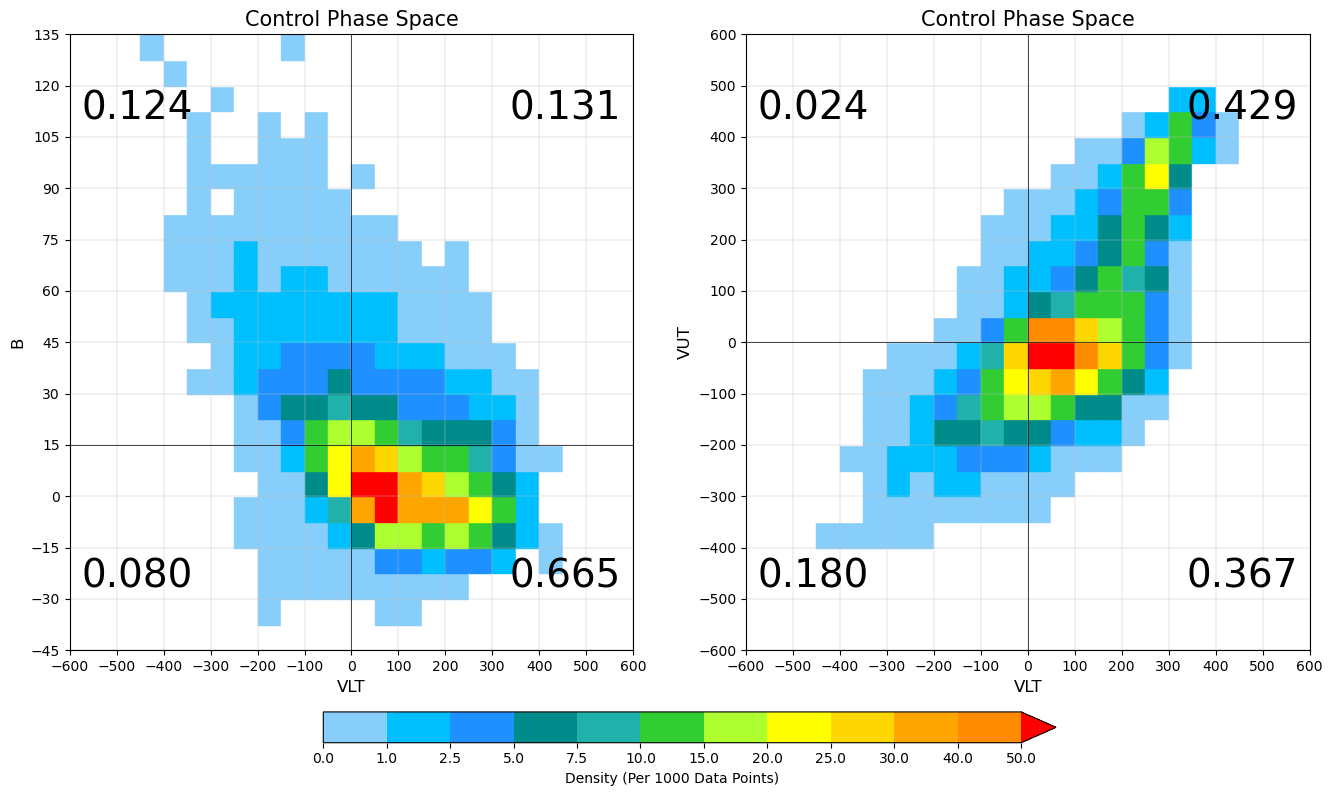

In [22]:
# Plot Phase Space Distribution For Control Run
Fig = Cyclone_Phase_Dist_Plot(Control_VLT_B, Control_VLT_VUT, VLT_Bins, B_Bins, \
Rela_Dist_Bounds, Rela_Dist_Colours, "Control", True)

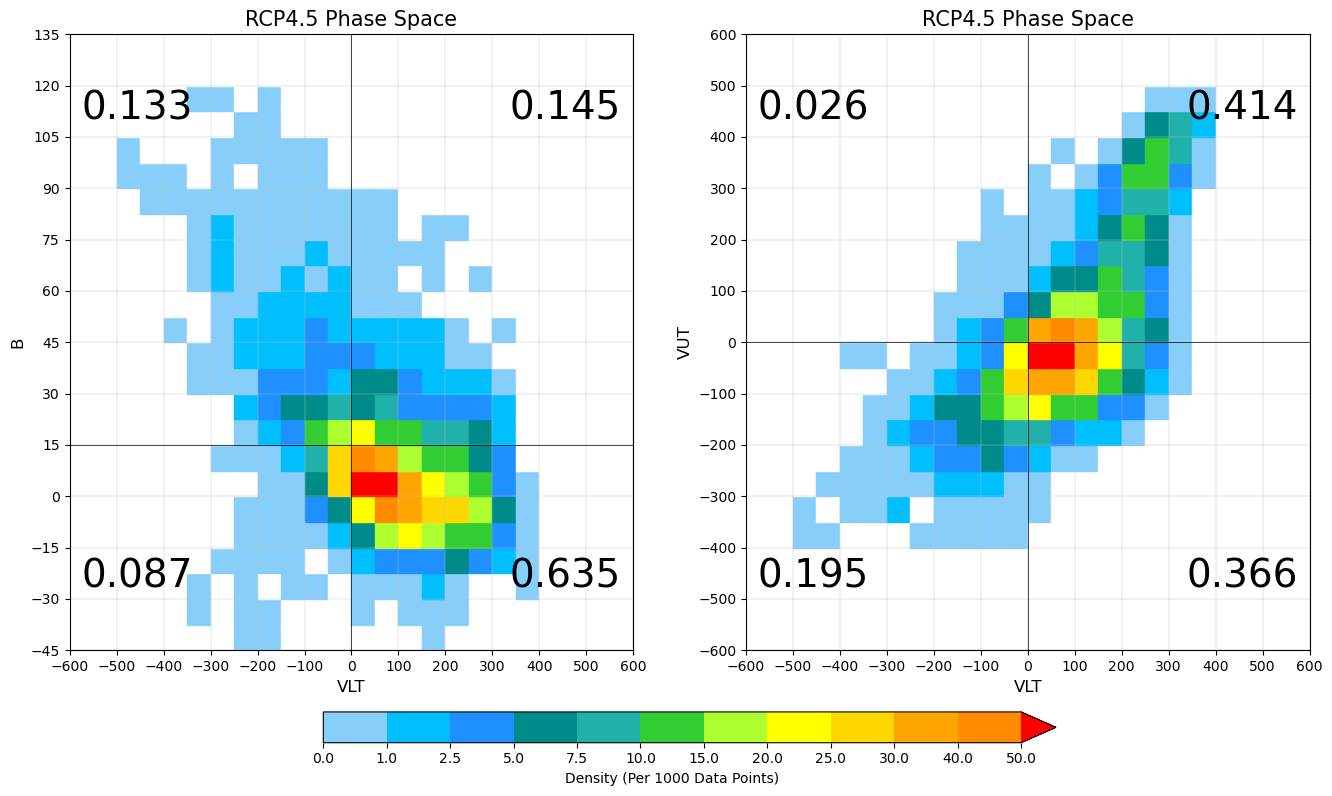

In [23]:
# Plot Phase Space Distribution For RCP4.5 Run
Fig = Cyclone_Phase_Dist_Plot(RCP45_VLT_B, RCP45_VLT_VUT, VLT_Bins, B_Bins, \
Rela_Dist_Bounds, Rela_Dist_Colours, "RCP4.5", True)

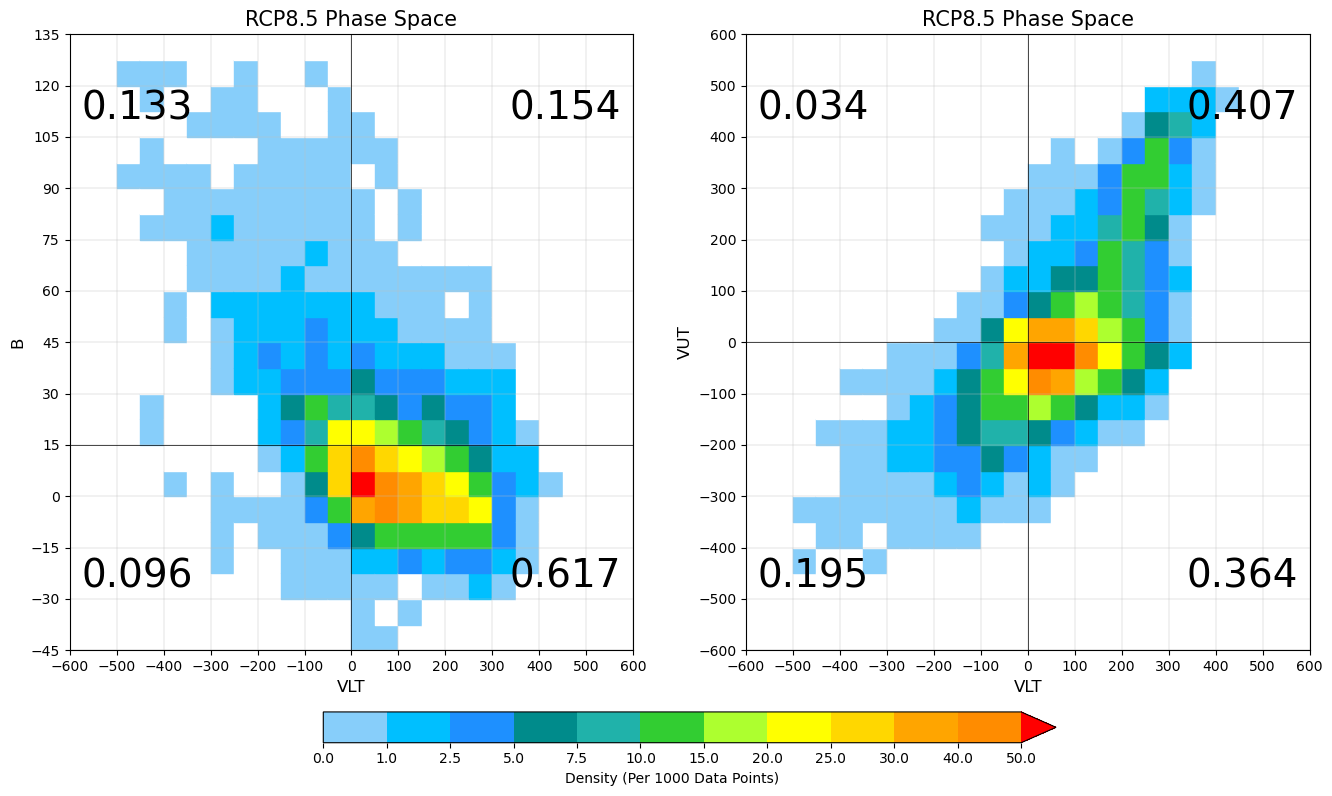

In [24]:
# Plot Phase Space Distribution For RCP8.5 Run
Fig = Cyclone_Phase_Dist_Plot(RCP85_VLT_B, RCP85_VLT_VUT, VLT_Bins, B_Bins, \
Rela_Dist_Bounds, Rela_Dist_Colours, "RCP8.5", True)

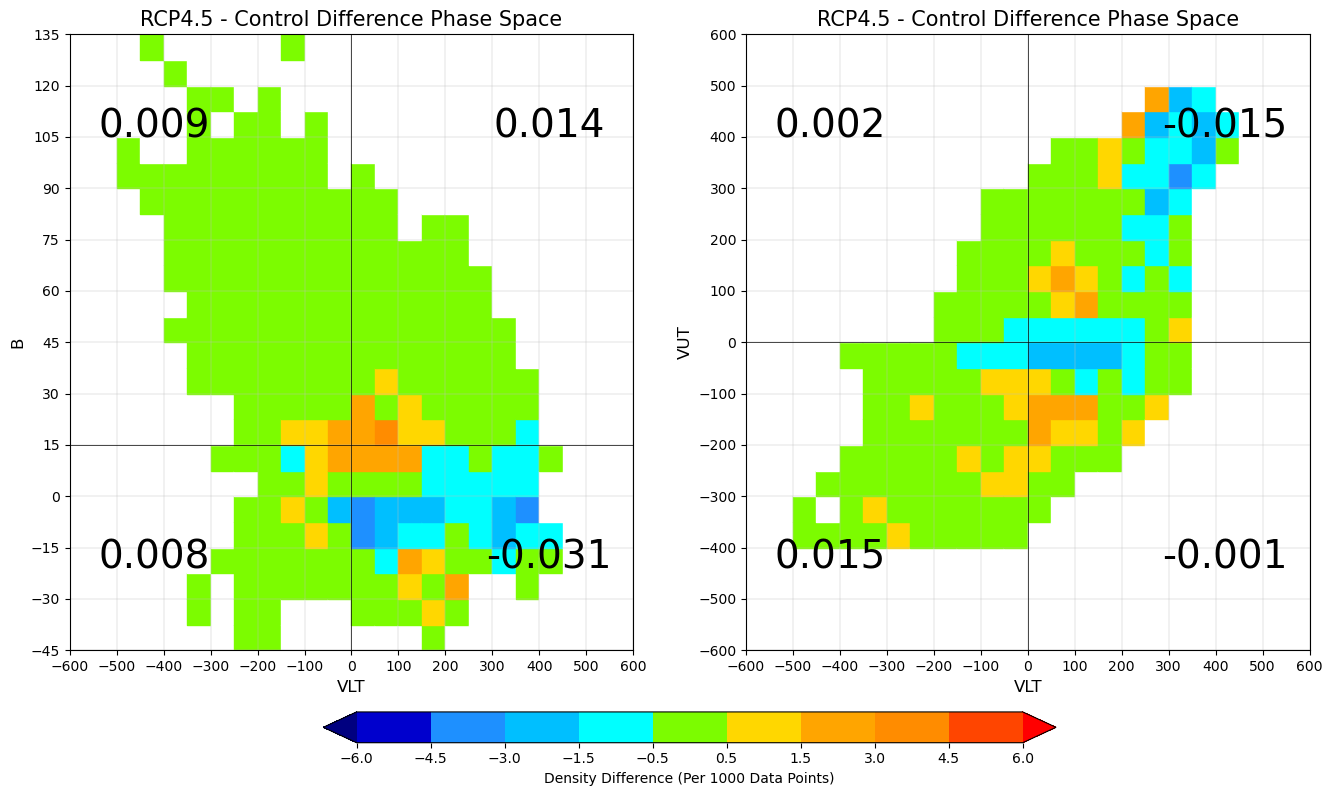

In [25]:
# Plot Difference Between Phase Space Distributions of RCP4.5 - Control (With Smoothing)
Cyclone_Phase_Diff_Plot("RCP4.5", "Control", RCP45_VLT_B, RCP45_VLT_VUT, Control_VLT_B, Control_VLT_VUT, \
VLT_Bins, B_Bins, Rela_Diff_Bounds, Rela_Diff_Colours, True, True)

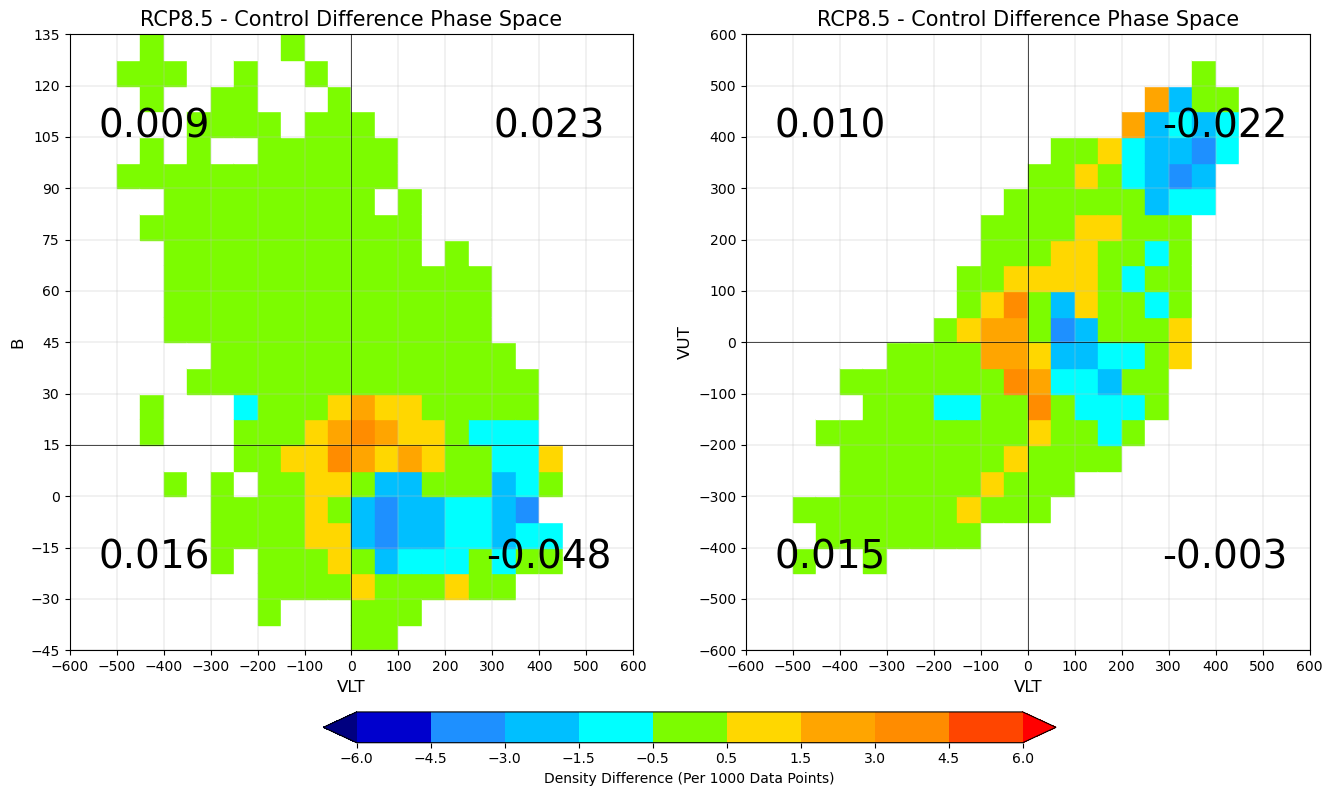

In [26]:
# Plot Difference Between Phase Space Distributions of RCP8.5 - Control (With Smoothing)
Cyclone_Phase_Diff_Plot("RCP8.5", "Control", RCP85_VLT_B, RCP85_VLT_VUT, Control_VLT_B, Control_VLT_VUT, \
VLT_Bins, B_Bins, Rela_Diff_Bounds, Rela_Diff_Colours, True, True)

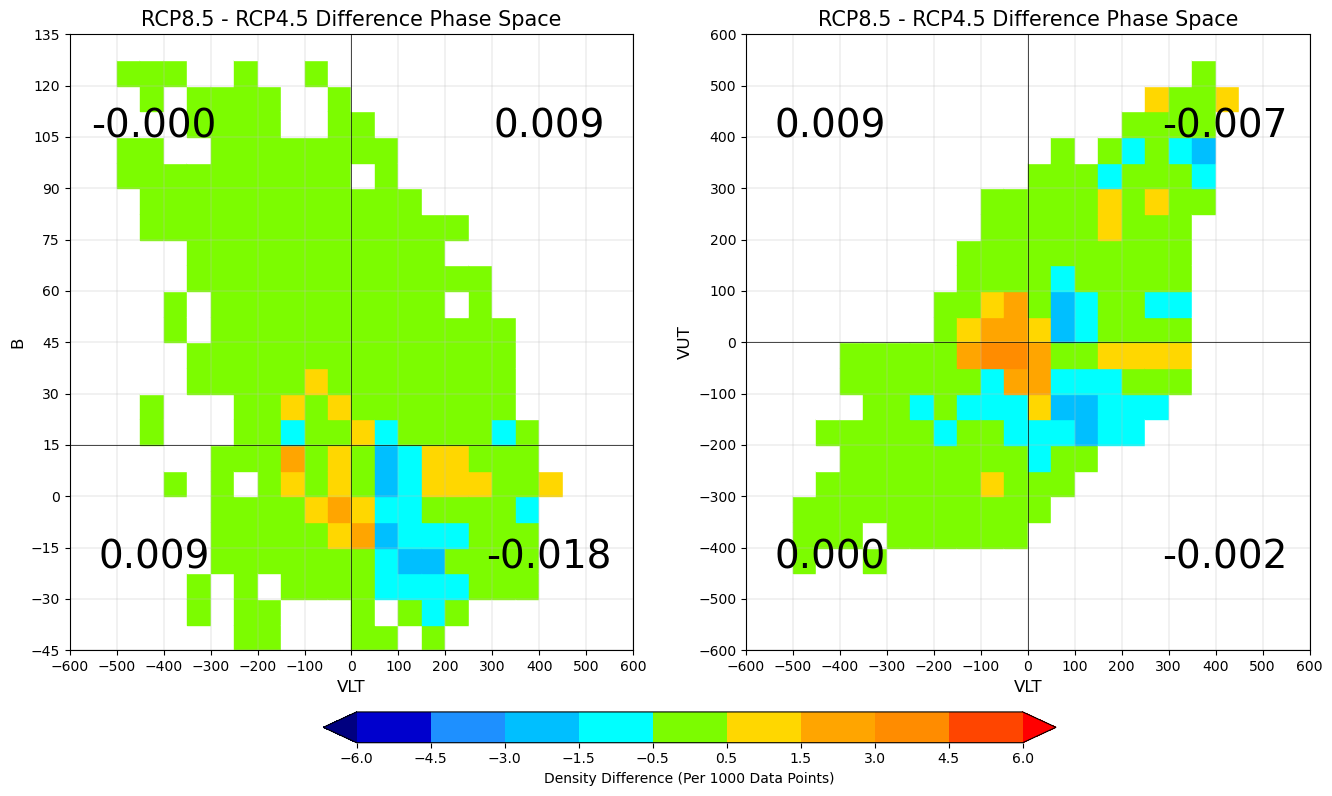

In [27]:
# Plot Difference Between Phase Space Distributions of RCP8.5 - RCP4.5 (With Smoothing)
Cyclone_Phase_Diff_Plot("RCP8.5", "RCP4.5", RCP85_VLT_B, RCP85_VLT_VUT, RCP45_VLT_B, RCP45_VLT_VUT, \
VLT_Bins, B_Bins, Rela_Diff_Bounds, Rela_Diff_Colours, True, True)

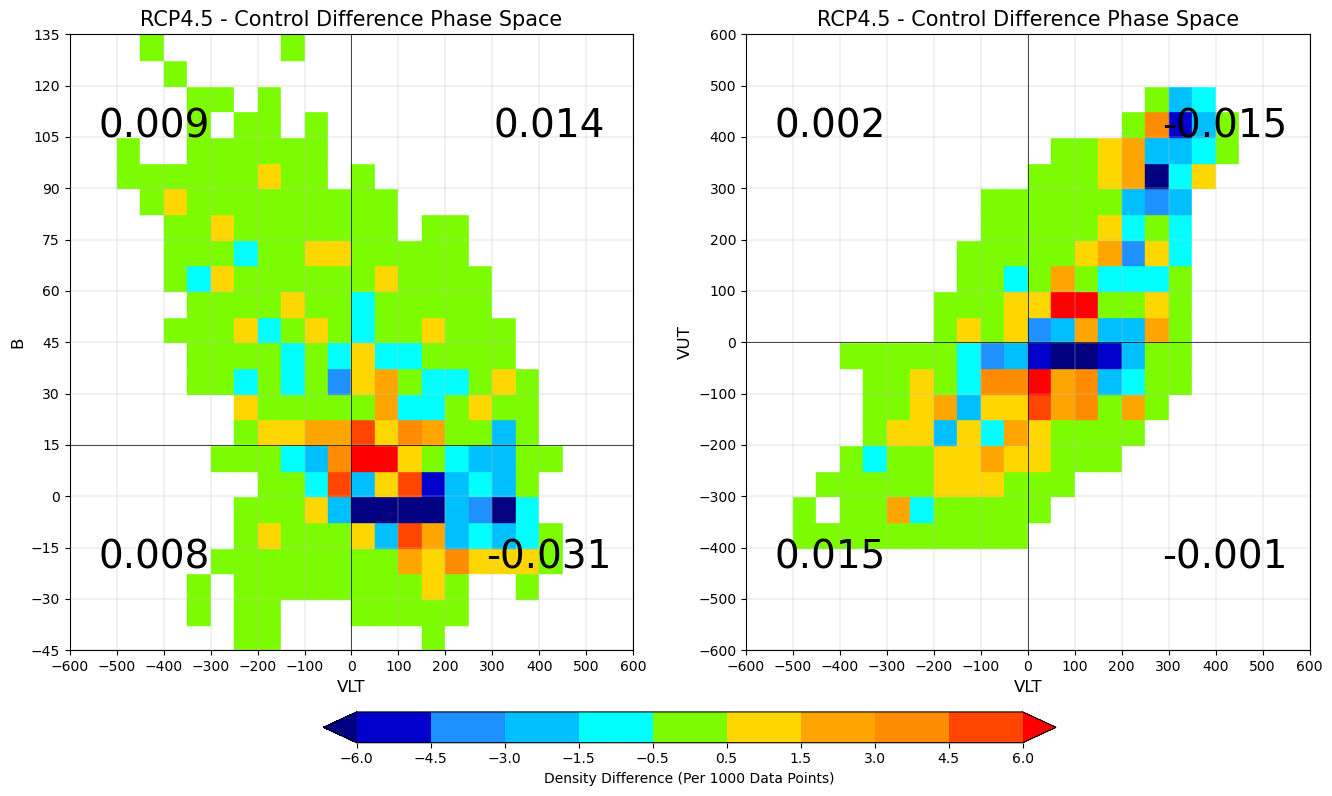

In [28]:
# Plot Difference Between Phase Space Distributions of RCP4.5 - Control (No Smoothing)
Cyclone_Phase_Diff_Plot("RCP4.5", "Control", RCP45_VLT_B, RCP45_VLT_VUT, Control_VLT_B, Control_VLT_VUT, \
VLT_Bins, B_Bins, Rela_Diff_Bounds, Rela_Diff_Colours, False, False)

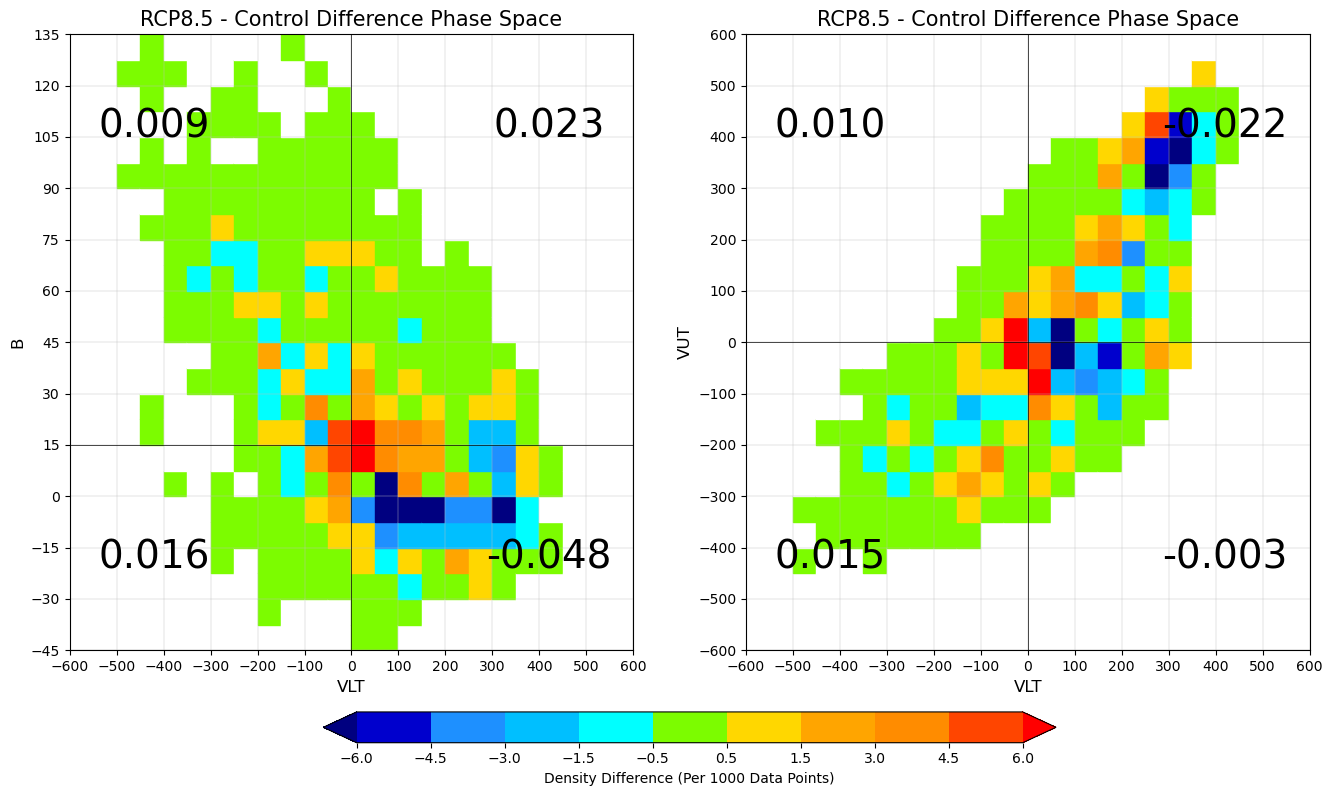

In [29]:
# Plot Difference Between Phase Space Distributions of RCP8.5 - Control (No Smoothing)
Cyclone_Phase_Diff_Plot("RCP8.5", "Control", RCP85_VLT_B, RCP85_VLT_VUT, Control_VLT_B, Control_VLT_VUT, \
VLT_Bins, B_Bins, Rela_Diff_Bounds, Rela_Diff_Colours, False, False)

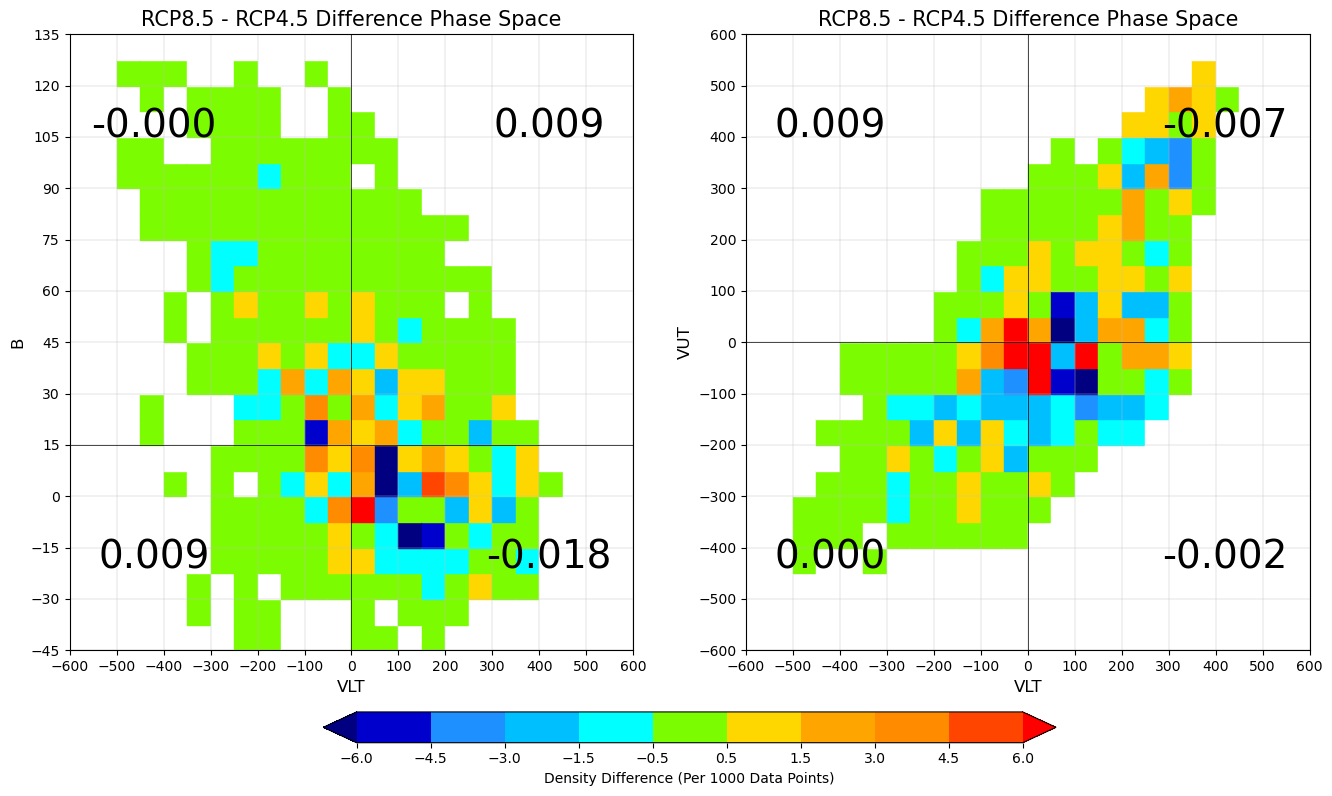

In [30]:
# Plot Difference Between Phase Space Distributions of RCP8.5 - RCP4.5 (No Smoothing)
Cyclone_Phase_Diff_Plot("RCP8.5", "RCP4.5", RCP85_VLT_B, RCP85_VLT_VUT, RCP45_VLT_B, RCP45_VLT_VUT, \
VLT_Bins, B_Bins, Rela_Diff_Bounds, Rela_Diff_Colours, False, False)

In [31]:
# Create Phase Distribution Bins
def Create_Bins(Min, Max, Bin_Width):
    Bins = numpy.arange(Min, Max+Bin_Width, Bin_Width)
    return (Bins)
VLT_Bins = Create_Bins(-600,600,50)
B_Bins = Create_Bins(-45,135,7.5)
Bins_Bounds = numpy.array([-600,600,50,-45,135,7.5])

In [32]:
# Combine All Three DataFrames
Data_All = pandas.concat([Control_Data, RCP45_Data, RCP85_Data]).reset_index()
Data_All = Data_All.drop("index", axis=1)

In [33]:
#Data = numpy.array([[728,413,430,320], [1216,714,1020,430], [1205,509,715,518], [208,830,702,223]])

In [34]:
#Data

In [35]:
#Gridboxes_List = []
#for k in range(4):
#    for l in range(4):
#        Gridboxes_List.append([k,l])
#Gridboxes = numpy.array(Gridboxes_List)
#print (Gridboxes)

In [36]:
#Array_1D = Grid_Shuffle(Gridboxes, Data)
#print (Array_1D)

In [37]:
#Grid_2D = numpy.zeros((4,4))
#for m in range(len(Array_1D)):
#    k = int(m / 4)
#    l = m % 4
#    Grid_2D[k][l] = Array_1D[m]
#    print (k, l, Array_1D[m])
#    print (Grid_2D)

In [38]:
# Shuffle Gridboxes
def Grid_Shuffle(Gridboxes, Data):
    Coord = Gridboxes.copy()
    numpy.random.shuffle(Coord)
    Sample_List = []
# Find Sample Datapoint of Each Shuffled Coordiate
    for m in range(len(Gridboxes)):
        k = Coord[m][0]
        l = Coord[m][1]
        Sample_List.append(Data[k][l])
#        print (k,l,Data[k][l])
    Sample = numpy.array(Sample_List)
    return (Sample)

In [39]:
def Convert_Grid(Array_1D, VLT_Len, B_Len):
#    print (len(Array_1D), VLT_Len, B_Len)
    Grid_2D = numpy.zeros((VLT_Len, B_Len))
    for m in range(len(Array_1D)):
        k = int(m / VLT_Len)
        l = m % VLT_Len
#        print (k, l, Array_1D[m])
        Grid_2D[k][l] = Array_1D[m]
    return (Grid_2D)

In [40]:
def Shuffle_Diff(Gridboxes, VLT_B_D1, VLT_B_D2, VLT_B_D3, VLT_VUT_D1, VLT_VUT_D2, VLT_VUT_D3, \
VLT_Len, B_Len):
# Shuffle Gridboxes For Each Dataset
    VLT_B_S1 = Grid_Shuffle(Gridboxes, VLT_B_D1)
    VLT_B_S2 = Grid_Shuffle(Gridboxes, VLT_B_D2)
    VLT_B_S3 = Grid_Shuffle(Gridboxes, VLT_B_D3)
    VLT_VUT_S1 = Grid_Shuffle(Gridboxes, VLT_VUT_D1)
    VLT_VUT_S2 = Grid_Shuffle(Gridboxes, VLT_VUT_D2)
    VLT_VUT_S3 = Grid_Shuffle(Gridboxes, VLT_VUT_D3)
#
# Calculate Difference Between Sample Datasets
    VLT_B_S2_S1_1D = VLT_B_S2 - VLT_B_S1
    VLT_B_S3_S1_1D = VLT_B_S3 - VLT_B_S1
    VLT_VUT_S2_S1_1D = VLT_VUT_S2 - VLT_VUT_S1
    VLT_VUT_S3_S1_1D = VLT_VUT_S3 - VLT_VUT_S1
#
# Return 1D Array to 2D Grid
    VLT_B_S2_S1 = Convert_Grid(VLT_B_S2_S1_1D, VLT_Len, B_Len)
    VLT_B_S3_S1 = Convert_Grid(VLT_B_S3_S1_1D, VLT_Len, B_Len)
    VLT_VUT_S2_S1 = Convert_Grid(VLT_VUT_S2_S1_1D, VLT_Len, B_Len)
    VLT_VUT_S3_S1 = Convert_Grid(VLT_VUT_S3_S1_1D, VLT_Len, B_Len)
    return (VLT_B_S2_S1, VLT_B_S3_S1, VLT_VUT_S2_S1, VLT_VUT_S3_S1)

In [41]:
def Compare_Count(Sample, Data, Compare):
    if Data < Sample:
        Compare += 0
    elif Data == Sample:
        Compare += 0.5
    elif Data > Sample:
        Compare += 1
    return (Compare)

In [42]:
# Permutation Test
def Permutation_Phase_Space_Points(DF_All, VLT_B_D1, VLT_B_D2, VLT_B_D3, \
VLT_VUT_D1, VLT_VUT_D2, VLT_VUT_D3, Smoothen, Num):
# Calculate Difference Between Actual Datasets
    if Smoothen == False:
        VLT_B_D2_D1, VLT_VUT_D2_D1 = Cyclone_Phase_Diff(VLT_B_D2, VLT_VUT_D2, VLT_B_D1, VLT_VUT_D1)
        VLT_B_D3_D1, VLT_VUT_D3_D1 = Cyclone_Phase_Diff(VLT_B_D3, VLT_VUT_D3, VLT_B_D1, VLT_VUT_D1)
    else:
        VLT_B_D2_D1, VLT_VUT_D2_D1 = Cyclone_Phase_Diff_New(VLT_B_D2, VLT_VUT_D2, VLT_B_D1, VLT_VUT_D1)
        VLT_B_D3_D1, VLT_VUT_D3_D1 = Cyclone_Phase_Diff_New(VLT_B_D3, VLT_VUT_D3, VLT_B_D1, VLT_VUT_D1)
#
# Create Array to Store Permutation Counts
    VLT_Len = len(VLT_B_D1)
    B_Len = len(VLT_B_D1[0])
    VUT_Len = len(VLT_VUT_D1[0])
    VLT_B_C2_C1 = numpy.zeros((VLT_Len, B_Len))
    VLT_B_C3_C1 = numpy.zeros((VLT_Len, B_Len))
    VLT_VUT_C2_C1 = numpy.zeros((VLT_Len, VUT_Len))
    VLT_VUT_C3_C1 = numpy.zeros((VLT_Len, VUT_Len))
#
# Create List of Every Gridbox
    Gridboxes_List = []
    for k in range(VLT_Len):
        for l in range(B_Len):
            Gridboxes_List.append([k,l])
    Gridboxes = numpy.array(Gridboxes_List)
#
# Use Function to Shuffle Gridboxes and Find Diffs Between Sample Datasets
    for n in range(Num):
        VLT_B_S2_S1, VLT_B_S3_S1, VLT_VUT_S2_S1, VLT_VUT_S3_S1 = Shuffle_Diff(Gridboxes, \
        VLT_B_D1, VLT_B_D2, VLT_B_D3, VLT_VUT_D1, VLT_VUT_D2, VLT_VUT_D3, VLT_Len, B_Len)
#
# Compare With Difference Between Actual Datasets
        for k in range(VLT_Len):
            for l in range(B_Len):
# Count How Many of Sample Differences are Smaller than the Actual Diff at Each Gridpoint
                VLT_B_C2_C1[k][l] = Compare_Count(VLT_B_S2_S1[k][l], VLT_B_D2_D1[k][l], VLT_B_C2_C1[k][l])
                VLT_B_C3_C1[k][l] = Compare_Count(VLT_B_S3_S1[k][l], VLT_B_D3_D1[k][l], VLT_B_C3_C1[k][l])
                VLT_VUT_C2_C1[k][l] = Compare_Count(VLT_VUT_S2_S1[k][l], VLT_VUT_D2_D1[k][l], VLT_VUT_C2_C1[k][l])
                VLT_VUT_C3_C1[k][l] = Compare_Count(VLT_VUT_S3_S1[k][l], VLT_VUT_D3_D1[k][l], VLT_VUT_C3_C1[k][l])
#        print (n)
#
# Calculate P Value
    VLT_B_P2_P1 = VLT_B_C2_C1 / Num
    VLT_B_P3_P1 = VLT_B_C3_C1 / Num
    VLT_VUT_P2_P1 = VLT_VUT_C2_C1 / Num
    VLT_VUT_P3_P1 = VLT_VUT_C3_C1 / Num
    return (VLT_B_P2_P1, VLT_B_P3_P1, VLT_VUT_P2_P1, VLT_VUT_P3_P1)

In [43]:
VLT_B_P2_P1, VLT_B_P3_P1, VLT_VUT_P2_P1, VLT_VUT_P3_P1 = Permutation_Phase_Space_Points(\
Data_All, Control_VLT_B, RCP45_VLT_B, RCP85_VLT_B, Control_VLT_VUT, RCP45_VLT_VUT, RCP85_VLT_VUT, False, 5000)

In [44]:
#VLT_B_P2_P1_New, VLT_B_P3_P1_New, VLT_VUT_P2_P1_New, VLT_VUT_P3_P1_New = Permutation_Phase_Space_Points(\
#Data_All, Control_VLT_B, RCP45_VLT_B, RCP85_VLT_B, Control_VLT_VUT, RCP45_VLT_VUT, RCP85_VLT_VUT, True, 5000)

In [45]:
def Cyclone_Phase_PVal_Colours(PVal):
    if PVal <= 0.02:
        Colour = 'navy'
    elif PVal <= 0.05:
        Colour = 'dodgerblue'
    elif PVal <= 0.1:
        Colour = 'deepskyblue'
#    elif PVal <= 0.15:
#        Colour = 'cyan'
    elif PVal >= 0.98:
        Colour = 'red'
    elif PVal >= 0.95:
        Colour = 'darkorange'
    elif PVal >= 0.9:
        Colour = 'orange'
#    elif PVal >= 0.85:
#        Colour = 'gold'
    else:
        Colour = 'limegreen'
    return (Colour)

In [46]:
# Plot Cyclone Phase Distribution Difference Between ERA and REA
def Cyclone_Phase_PVal_Plot(VLT_B_PVal, VLT_VUT_PVal, VLT_Bins, B_Bins, Savefig):
# Apply Difference Between Models Function
#    VLT_B_Diff, VLT_VUT_Diff = Cyclone_Phase_Diff(VLT_B_1, VLT_VUT_1, VLT_B_2, VLT_VUT_2)
#
# VLT B Distribution
    Fig = pyplot.figure(figsize=(16,8))
    Axis = Fig.add_subplot(1,2,1)
    for j in range(len(VLT_B_PVal)):
        for k in range(len(VLT_B_PVal[0])):
            Colour = Cyclone_Phase_PVal_Colours(VLT_B_PVal[j][k])
            pyplot.fill_between([VLT_Bins[j],VLT_Bins[j+1]], B_Bins[k], B_Bins[k+1], color=Colour)
    x_Axis = numpy.arange(Bins_Bounds[0],Bins_Bounds[1]+100,100)
    y_Axis = numpy.arange(Bins_Bounds[3],Bins_Bounds[4]+15,15)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(Bins_Bounds[0],Bins_Bounds[1])
    pyplot.ylim(Bins_Bounds[3],Bins_Bounds[4])
    pyplot.plot([-1000,1000], [15,15], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-150,300], 'black', linewidth=0.5)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('B', fontsize=12)
#    pyplot.title(str(Model_1 + ' - ' + Model_2 + ' Difference Phase Space P Value'), fontsize=15)
#
# VLT VUT Distribution
    Axis = Fig.add_subplot(1,2,2)
    for j in range(len(VLT_VUT_PVal)):
        for l in range(len(VLT_VUT_PVal[0])):
            Colour = Cyclone_Phase_PVal_Colours(VLT_VUT_PVal[j][l])
            pyplot.fill_between([VLT_Bins[j],VLT_Bins[j+1]], VLT_Bins[l], VLT_Bins[l+1], color=Colour)
    x_Axis = numpy.arange(Bins_Bounds[0],Bins_Bounds[1]+100,100)
    y_Axis = numpy.arange(Bins_Bounds[0],Bins_Bounds[1]+100,100)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(Bins_Bounds[0],Bins_Bounds[1])
    pyplot.ylim(Bins_Bounds[0],Bins_Bounds[1])
    pyplot.plot([-1000,1000], [0,0], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-1000,1000], 'black', linewidth=0.5)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('VUT', fontsize=12)
#    pyplot.title(str(Model_1 + ' - ' + Model_2 + ' Difference Phase Space P Value'), fontsize=15)
#
# Colour Bar
#    Cbar_Label = 'Density Difference (Per 1000 Data Points)'
#    elif Type == "Annual":
#        Cbar_Label = 'Density Difference (Per Year)'
#    C_Map = mcolors.LinearSegmentedColormap.from_list("Density (10^-3)", Diff_Colours, N=len(Diff_Colours))
#    Norm = mcolors.BoundaryNorm(Diff_Bounds, C_Map.N, extend='both')
#    Cax = Axis.inset_axes([-0.75, -0.15, 1.3, 0.05], transform=Axis.transAxes)
#    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, \
#    label=Cbar_Label, ticks=Diff_Bounds, shrink=0.7)
#
# Save Fig
    if Savefig == True:
        Figname = str(Model_1 + '-' + Model_2 + '_Phase_Diff.png')
        Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

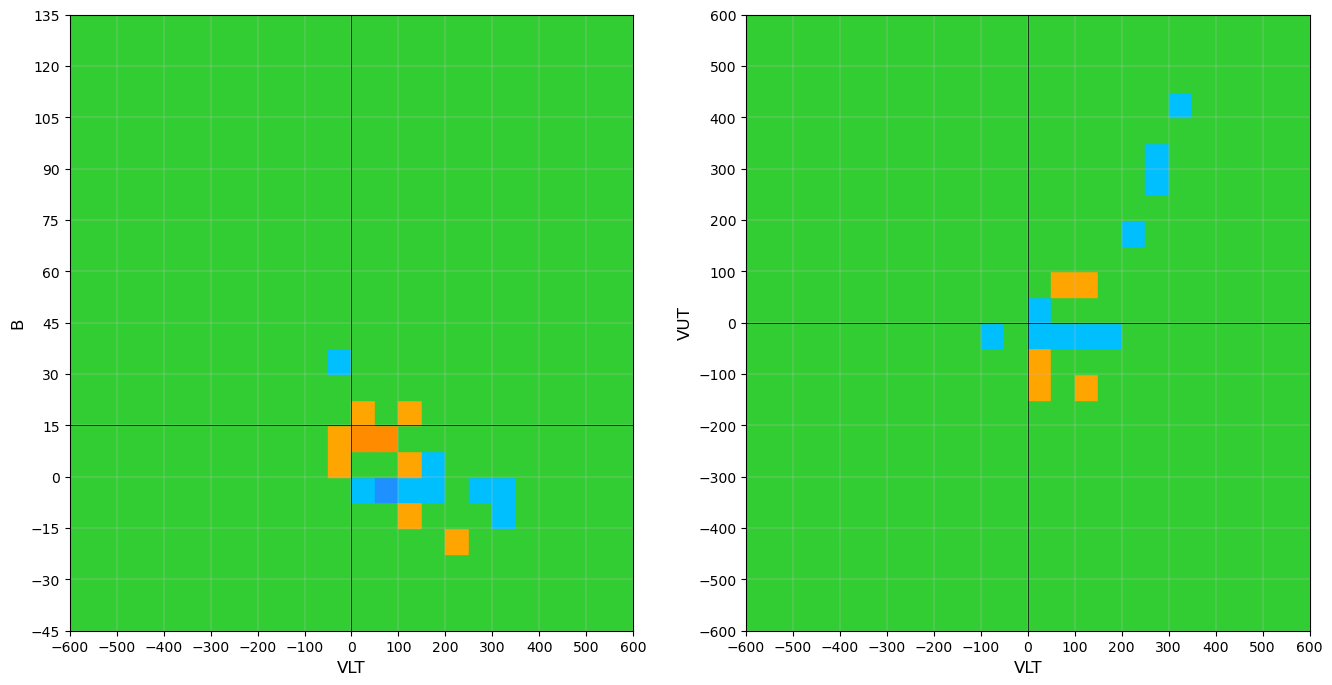

In [47]:
# No Smoothing
Cyclone_Phase_PVal_Plot(VLT_B_P2_P1, VLT_VUT_P2_P1, VLT_Bins, B_Bins, False)

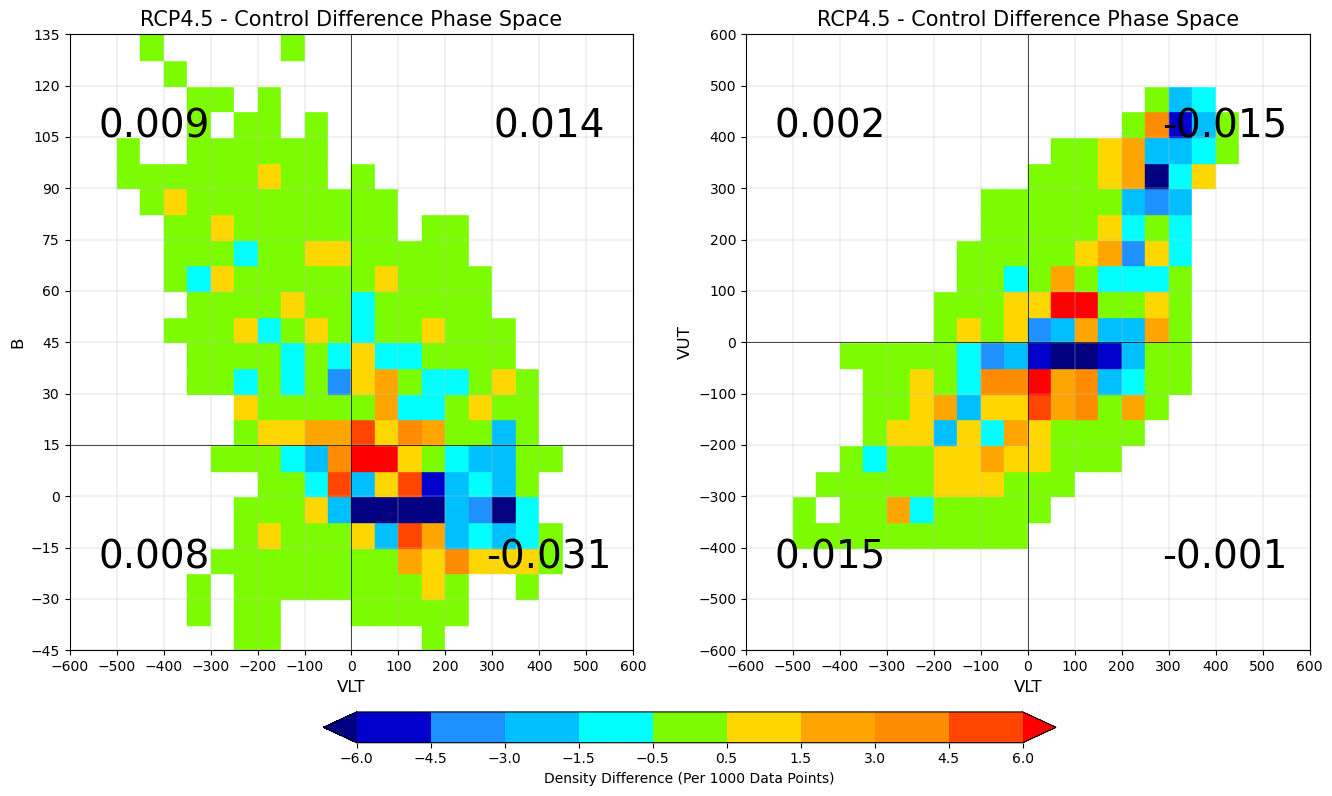

In [48]:
# Plot Difference Between Phase Space Distributions of RCP4.5 - Control (No Smoothing)
Cyclone_Phase_Diff_Plot("RCP4.5", "Control", RCP45_VLT_B, RCP45_VLT_VUT, Control_VLT_B, Control_VLT_VUT, \
VLT_Bins, B_Bins, Rela_Diff_Bounds, Rela_Diff_Colours, False, False)

In [49]:
# With Smoothing
#Cyclone_Phase_PVal_Plot(VLT_B_P2_P1_New, VLT_VUT_P2_P1_New, VLT_Bins, B_Bins, False)

In [50]:
# Plot Difference Between Phase Space Distributions of RCP4.5 - Control (With Smoothing)
#Cyclone_Phase_Diff_Plot("RCP4.5", "Control", RCP45_VLT_B, RCP45_VLT_VUT, Control_VLT_B, Control_VLT_VUT, \
#VLT_Bins, B_Bins, Rela_Diff_Bounds, Rela_Diff_Colours, True, False)

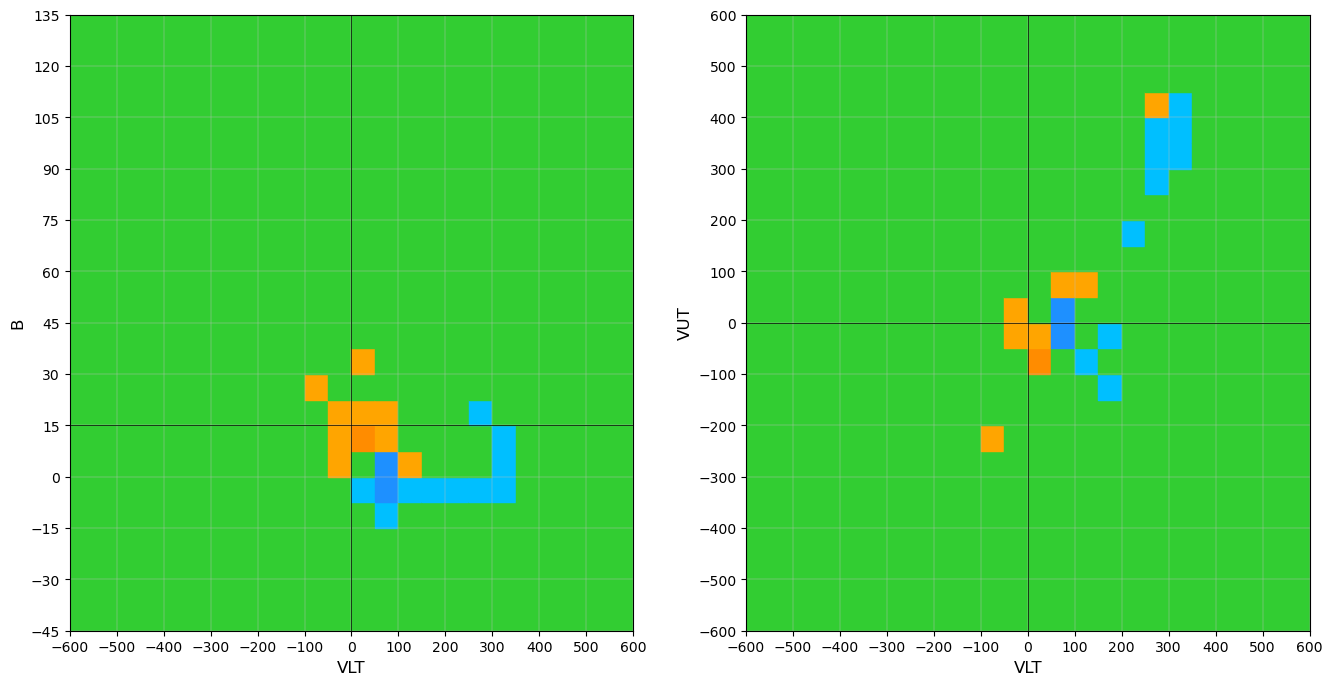

In [51]:
# No Smoothing
Cyclone_Phase_PVal_Plot(VLT_B_P3_P1, VLT_VUT_P3_P1, VLT_Bins, B_Bins, False)

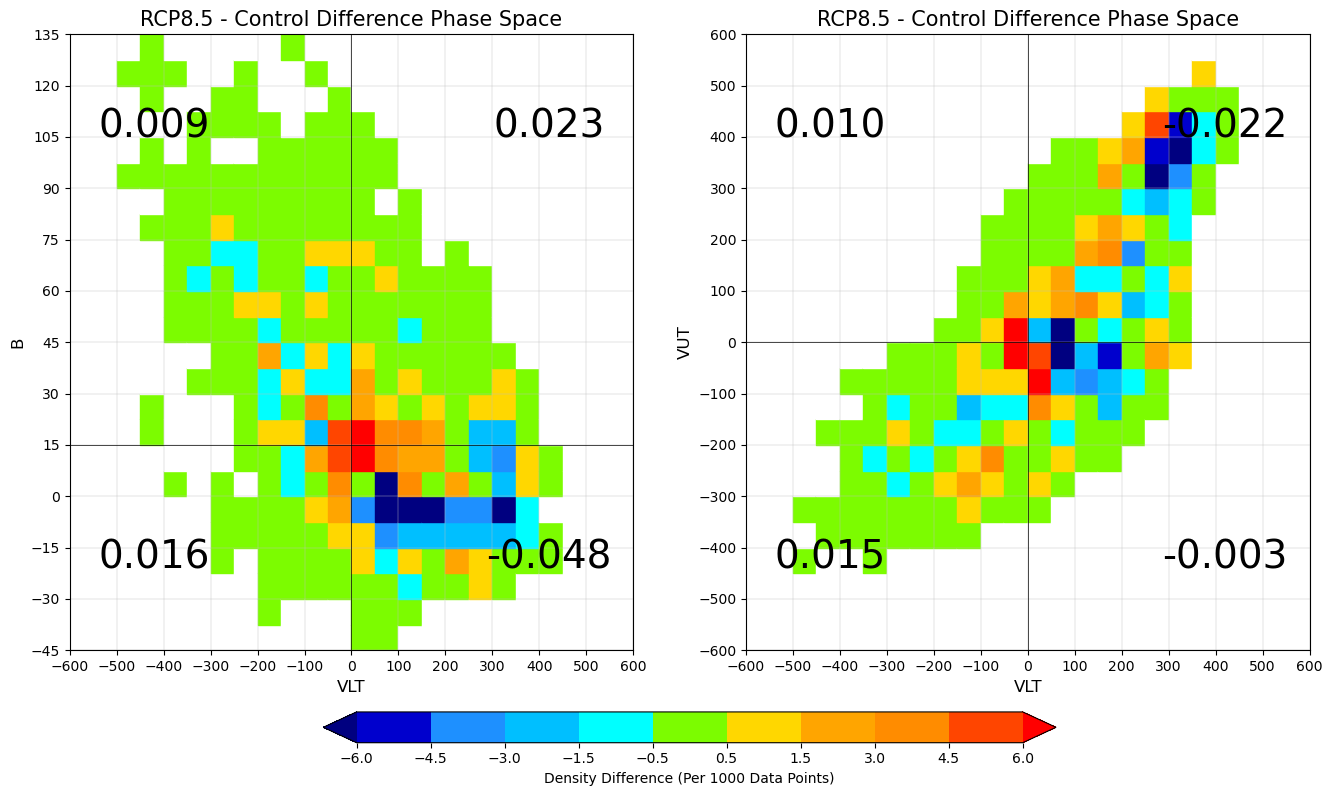

In [52]:
# Plot Difference Between Phase Space Distributions of RCP4.5 - Control (No Smoothing)
Cyclone_Phase_Diff_Plot("RCP8.5", "Control", RCP85_VLT_B, RCP85_VLT_VUT, Control_VLT_B, Control_VLT_VUT, \
VLT_Bins, B_Bins, Rela_Diff_Bounds, Rela_Diff_Colours, False, False)

In [53]:
# With Smoothing
#Cyclone_Phase_PVal_Plot(VLT_B_P3_P1_New, VLT_VUT_P3_P1_New, VLT_Bins, B_Bins, False)

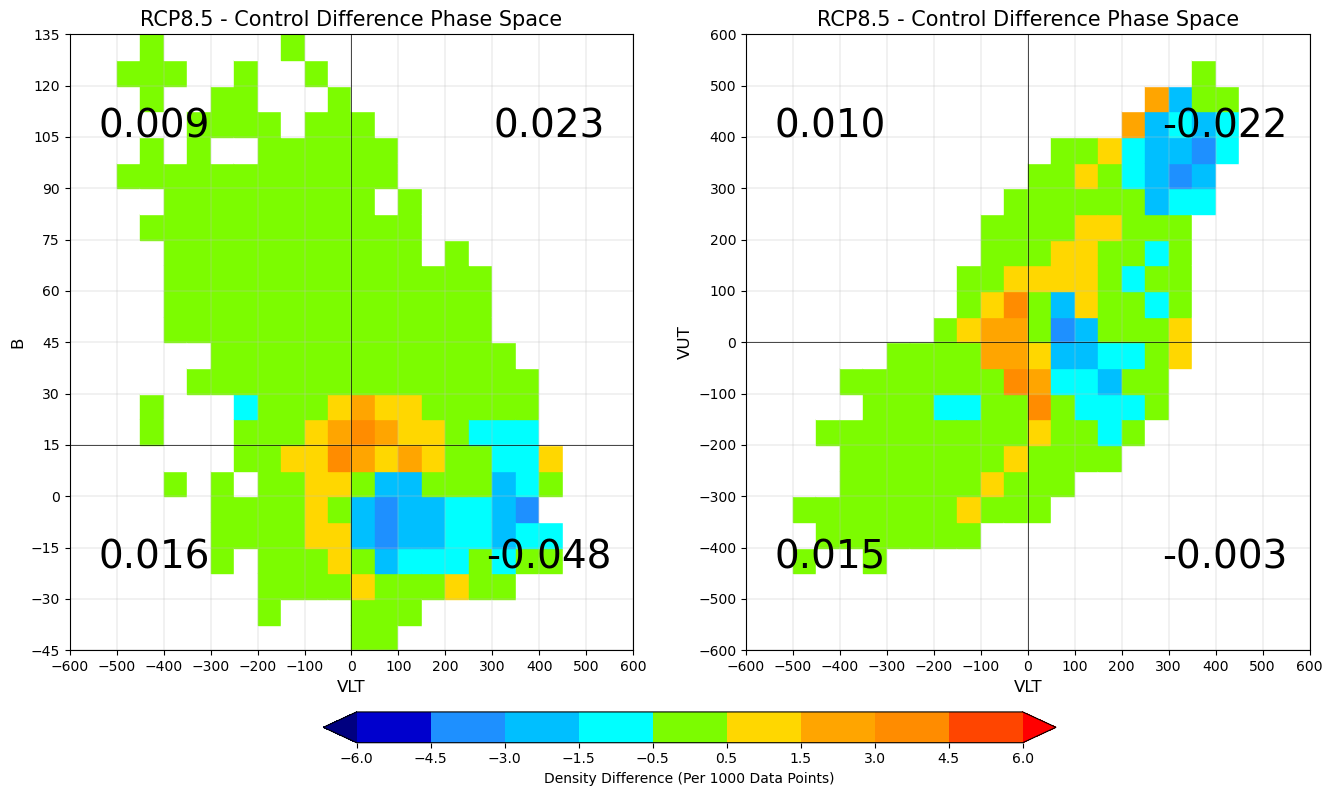

In [54]:
# Plot Difference Between Phase Space Distributions of RCP4.5 - Control (With Smoothing)
Cyclone_Phase_Diff_Plot("RCP8.5", "Control", RCP85_VLT_B, RCP85_VLT_VUT, Control_VLT_B, Control_VLT_VUT, \
VLT_Bins, B_Bins, Rela_Diff_Bounds, Rela_Diff_Colours, True, False)

In [55]:
VLT_Bins_100 = Create_Bins(-600,600,100)
B_Bins_100 = Create_Bins(-45,135,15)
Bins_Bounds_100 = numpy.array([-600,600,100,-45,135,5])

In [56]:
# Phase Space Distribution For Control Run
Control_VLT_B_100, Control_VLT_VUT_100 = Phase_Space_Distribution(Control_Data, VLT_Bins_100, B_Bins_100)
# Phase Space Distribution For RCP4.5 Run
RCP45_VLT_B_100, RCP45_VLT_VUT_100 = Phase_Space_Distribution(RCP45_Data, VLT_Bins_100, B_Bins_100)
# Phase Space Distribution For RCP8.5 Run
RCP85_VLT_B_100, RCP85_VLT_VUT_100 = Phase_Space_Distribution(RCP85_Data, VLT_Bins_100, B_Bins_100)

In [57]:
VLT_B_P2_P1_100, VLT_B_P3_P1_100, VLT_VUT_P2_P1_100, VLT_VUT_P3_P1_100 = Permutation_Phase_Space_Points(\
Data_All, Control_VLT_B_100, RCP45_VLT_B_100, RCP85_VLT_B_100, \
Control_VLT_VUT_100, RCP45_VLT_VUT_100, RCP85_VLT_VUT_100, False, 5000)

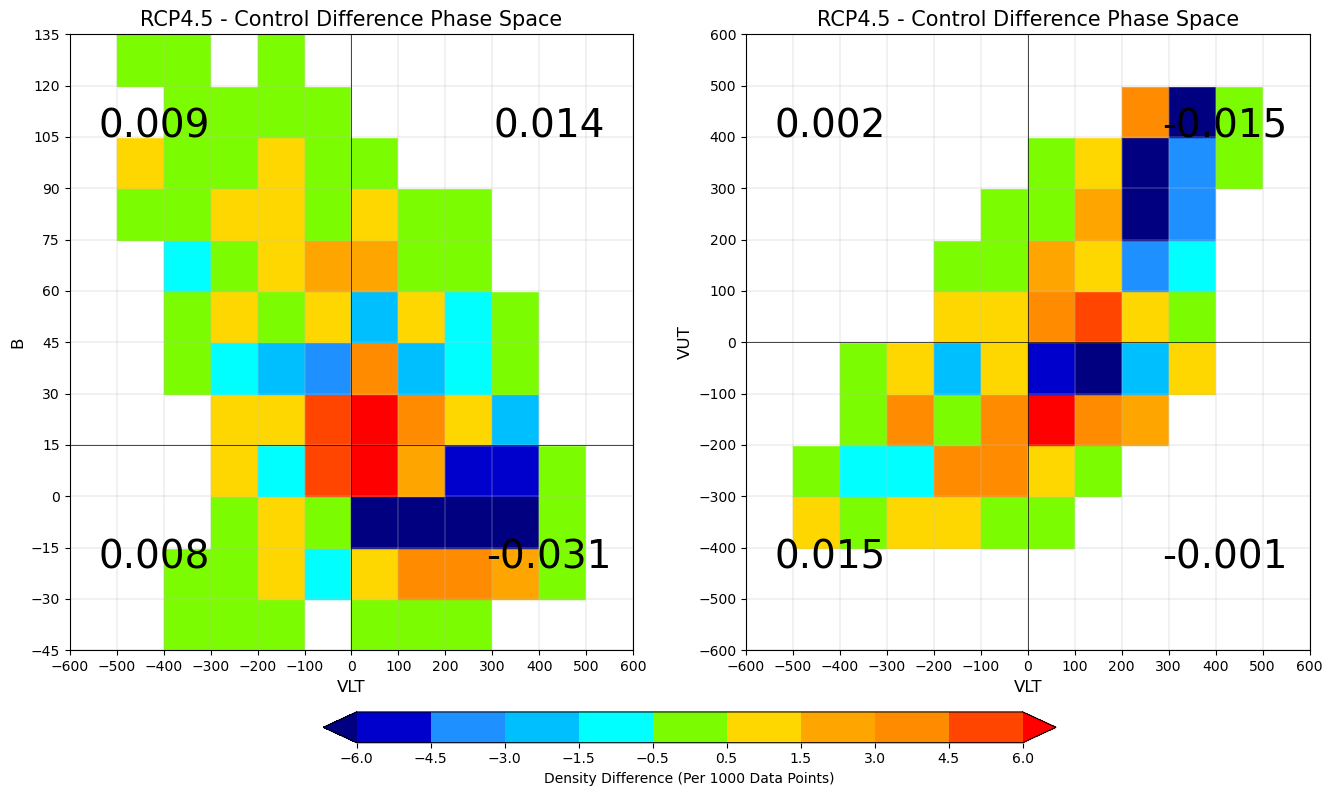

In [58]:
# Plot Difference Between Phase Space Distributions of RCP4.5 - Control (No Smoothing)
Cyclone_Phase_Diff_Plot("RCP4.5", "Control", RCP45_VLT_B_100, RCP45_VLT_VUT_100, Control_VLT_B_100, Control_VLT_VUT_100, \
VLT_Bins_100, B_Bins_100, Rela_Diff_Bounds, Rela_Diff_Colours, False, False)

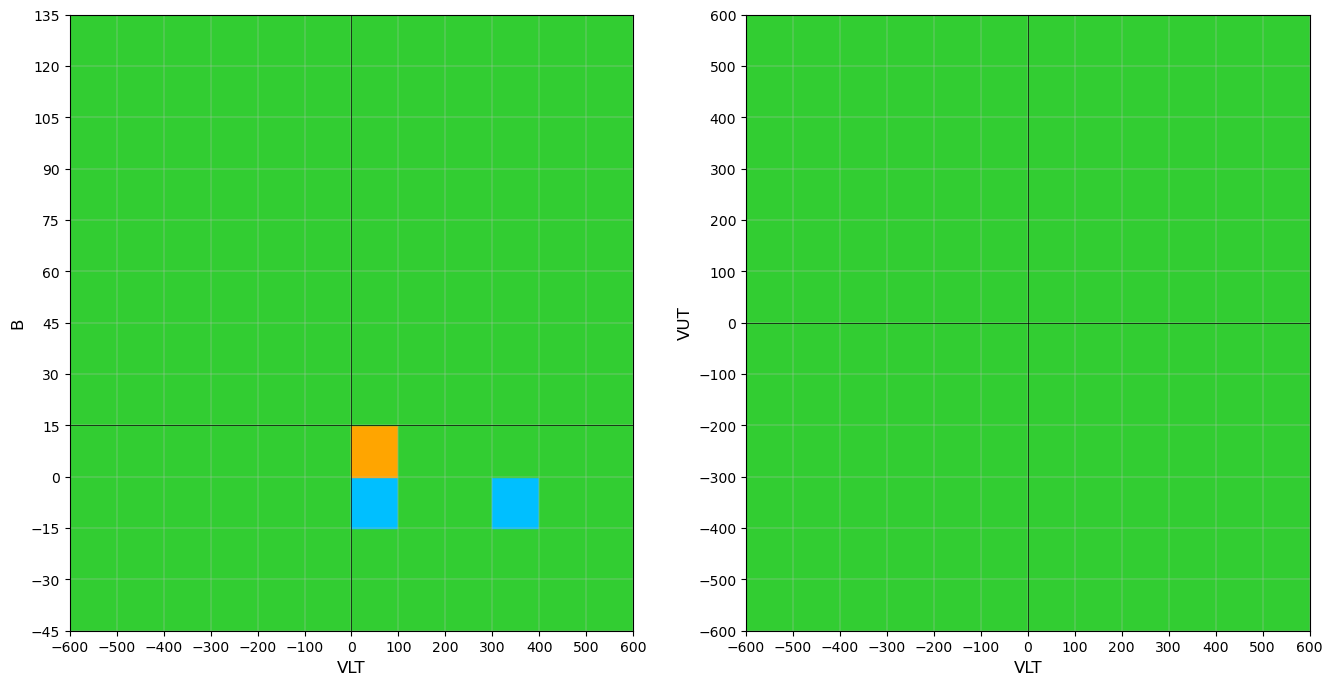

In [59]:
# No Smoothing
Cyclone_Phase_PVal_Plot(VLT_B_P2_P1_100, VLT_VUT_P2_P1_100, VLT_Bins_100, B_Bins_100, False)

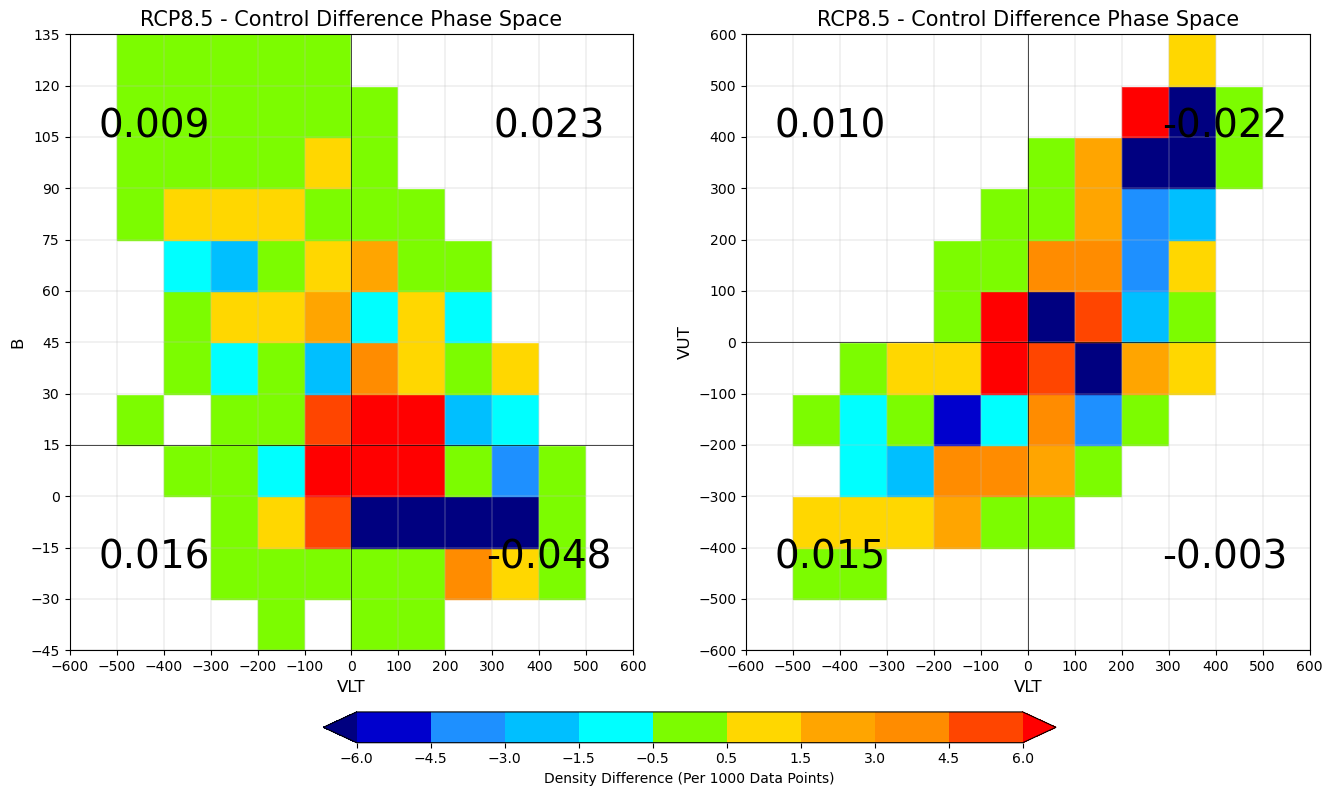

In [60]:
# Plot Difference Between Phase Space Distributions of RCP4.5 - Control (No Smoothing)
Cyclone_Phase_Diff_Plot("RCP8.5", "Control", RCP85_VLT_B_100, RCP85_VLT_VUT_100, Control_VLT_B_100, Control_VLT_VUT_100, \
VLT_Bins_100, B_Bins_100, Rela_Diff_Bounds, Rela_Diff_Colours, False, False)

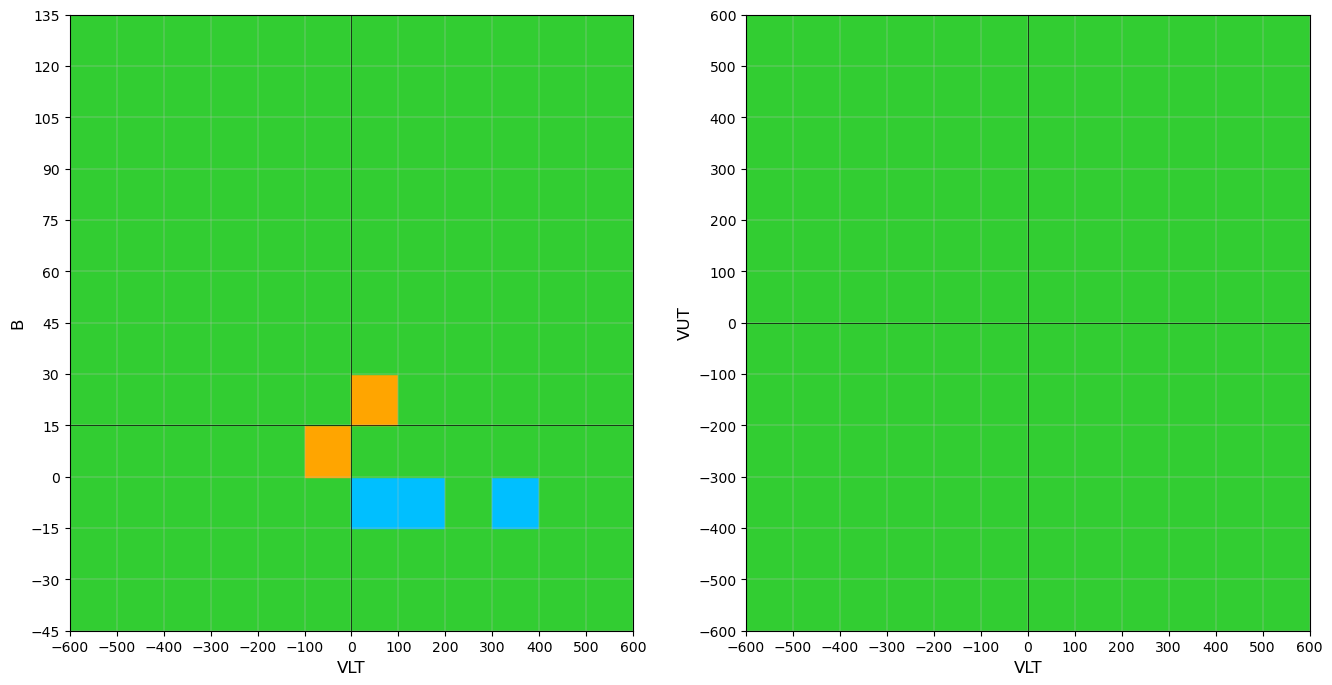

In [61]:
# No Smoothing
Cyclone_Phase_PVal_Plot(VLT_B_P3_P1_100, VLT_VUT_P3_P1_100, VLT_Bins_100, B_Bins_100, False)